In [2]:
import numpy as np
import tensorflow as tf
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
import scipy.io as sio
import pandas as pd
import cv2
import os
from matplotlib import pyplot as plt

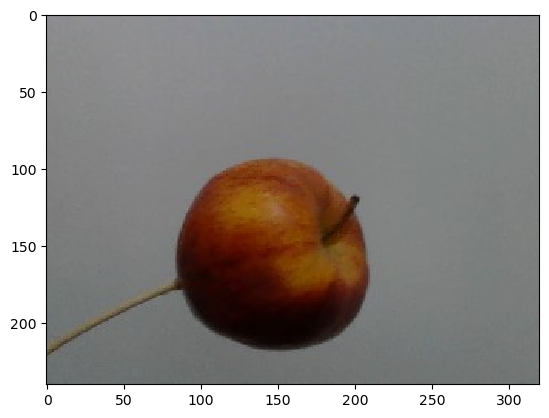

In [3]:
DATADIR = "collected_images"
CATEGORIES = ["Apple", "Banana"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category) #Path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break    

In [4]:
print(img_array)
print(img_array.shape)

[[[148 143 144]
  [147 142 143]
  [145 140 141]
  ...
  [145 141 140]
  [144 139 138]
  [144 139 138]]

 [[147 142 143]
  [146 141 142]
  [145 140 141]
  ...
  [144 140 139]
  [144 139 138]
  [144 139 138]]

 [[145 140 141]
  [145 140 141]
  [145 140 141]
  ...
  [143 139 138]
  [144 139 138]
  [144 139 138]]

 ...

 [[110 111 102]
  [110 111 102]
  [110 111 102]
  ...
  [114 115 111]
  [114 115 111]
  [115 116 112]]

 [[111 112 103]
  [111 112 103]
  [110 111 102]
  ...
  [114 115 111]
  [115 116 112]
  [116 117 113]]

 [[110 111 102]
  [109 110 101]
  [109 110 101]
  ...
  [116 117 113]
  [117 118 114]
  [117 118 114]]]
(240, 320, 3)


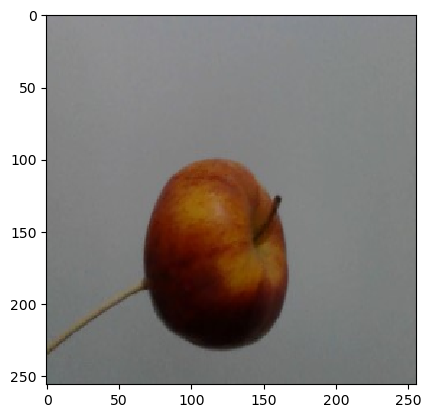

In [5]:
IMG_SIZE = 256
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category) #Path to cats or dogs dir
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])  
            except Exception as e:
                pass

create_training_data()          

In [7]:
print(len(training_data))

1293


In [8]:
import random 

random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
1
1
0
1
1
1


In [10]:
x = []
y = []

In [11]:
for features, labels in training_data:
    x.append(features)
    y.append(labels)

#nsamples, nx, ny = np.array(x).shape
x = np.array(x).reshape(-1, 256, 256, 3)

In [12]:
X = x/255
X[0]
X.shape

(1293, 256, 256, 3)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .7)

In [20]:
X_Train= np.array(X_train).reshape(-1, 256*256)
X_Test = np.array(X_test).reshape(-1, 256*256)
print(X_Train.shape)
print(X_Test.shape)

(2715, 65536)
(1164, 65536)


In [15]:
model = GaussianMixture(n_components=15, covariance_type='diag', max_iter=100, random_state=42,tol=0.1, n_init=1).fit(X_Train)

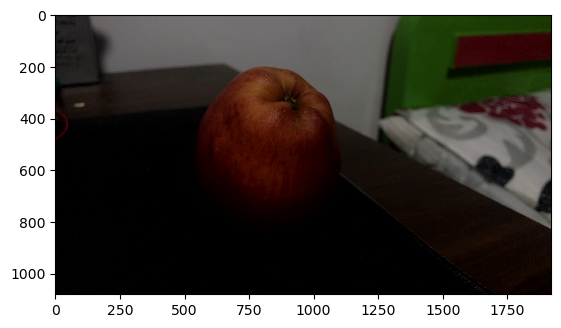

(1080, 1920, 3)

In [16]:
img = cv2.imread('bananashot.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
img.shape

2023-01-03 14:07:43.891336: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aliub20/.local/lib/python3.8/site-packages/cv2/../../lib64:/home/aliub20/catkin_ws/devel/lib:/opt/ros/noetic/lib
2023-01-03 14:07:43.892438: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-03 14:07:43.893277: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aliub20): /proc/driver/nvidia/version does not exist
2023-01-03 14:07:43.917883: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations,

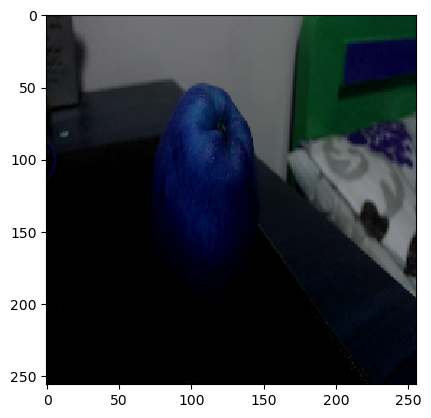

TensorShape([256, 256, 3])

In [17]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
resize.shape

In [21]:
yhat = model.predict(X_Test)

In [22]:
yhat

array([ 7, 10, 12, ...,  3, 11,  4])

In [23]:
from tensorflow.keras.models import load_model

In [24]:
model.save(os.path.join('models', 'GMM_BA.h5'))

AttributeError: 'GaussianMixture' object has no attribute 'save'

In [ ]:
new_model = load_model(os.path.join('models','ANN_BA.h5'))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
if yhatnew >0.5:
    print("Predicted class is Banana")
else:
    print("Predicted class is Apple")